Types of recommendation system:

1) Content based recommendation system  -recommend more options based on historty
2) popularity based -----//---
3) collaborative ---////---- mainly focused on users pattern



:






Work flow
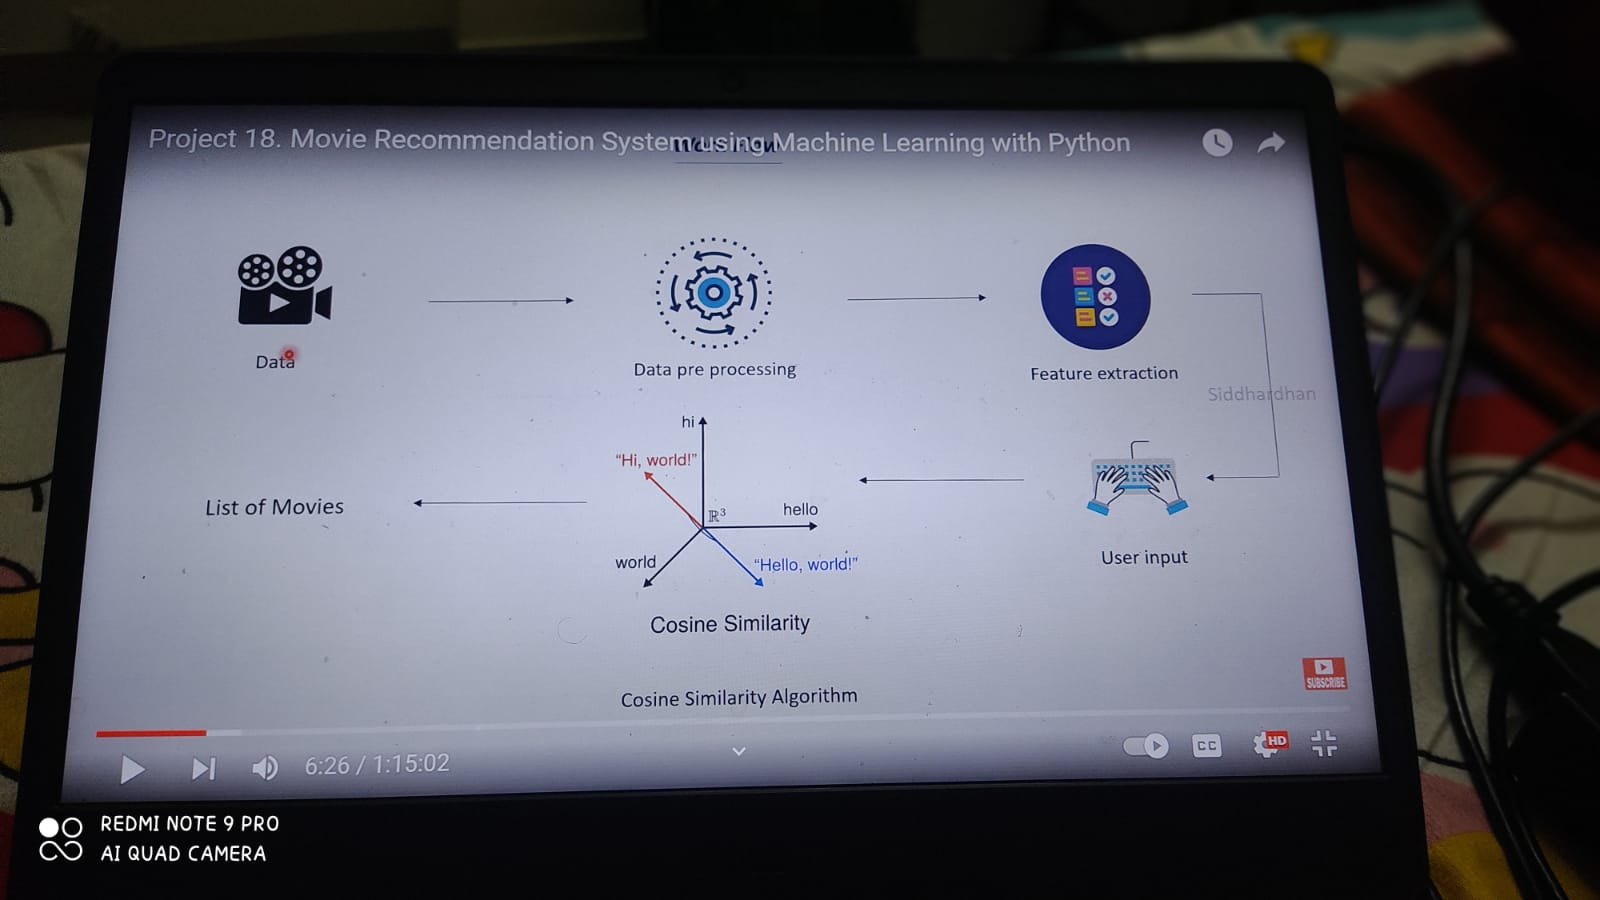

In [1]:
import numpy as np
import pandas as pd
import difflib # user can give movies name so to find close match of i/p
from sklearn.feature_extraction.text import TfidfVectorizer  # TfidfVectorizer used to conver text data into nummerical value
from sklearn.metrics.pairwise import cosine_similarity

Data Collection and preprocessing

In [4]:
# loading data from csv to pandas dataframe
movies_data =pd.read_csv('/content/movies.csv')

In [7]:
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [8]:
# find no of rows & coloumn in dataframe
movies_data.shape

(4803, 24)

In [9]:
# selecting the relevent features for recommendation
selected_features =['genres','keywords','tagline' ,'cast' ,'director']

print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [10]:
#replacng the missing/null values with null string

for feature in selected_features :
  movies_data[feature] = movies_data[feature].fillna('')

In [12]:
from ast import keyword
# combining all the file selected features

combine_features = movies_data['genres'] +''+ movies_data['keywords'] +''+ movies_data['tagline'] +''+movies_data['cast'] +''+['director']

In [13]:
print(combine_features)

0       Action Adventure Fantasy Science Fictioncultur...
1       Adventure Fantasy Actionocean drug abuse exoti...
2       Action Adventure Crimespy based on novel secre...
3       Action Crime Drama Thrillerdc comics crime fig...
4       Action Adventure Science Fictionbased on novel...
                              ...                        
4798    Action Crime Thrillerunited states\u2013mexico...
4799    Comedy RomanceA newlywed couple's honeymoon is...
4800    Comedy Drama Romance TV Moviedate love at firs...
4801    A New Yorker in ShanghaiDaniel Henney Eliza Co...
4802    Documentaryobsession camcorder crush dream gir...
Length: 4803, dtype: object


In [14]:
#Converting text to numerical data

vectorizer = TfidfVectorizer()

In [15]:
feature_vectors =vectorizer.fit_transform(combine_features)

In [16]:
print(feature_vectors)

  (0, 18398)	0.2564421528740414
  (0, 14726)	0.15957063169340832
  (0, 12964)	0.24359089788232116
  (0, 20663)	0.16439436569049035
  (0, 23622)	0.1996521668495562
  (0, 19966)	0.20543086585470333
  (0, 19110)	0.21908457116762534
  (0, 24444)	0.20100109785818776
  (0, 24134)	0.2387050774899074
  (0, 19137)	0.15919992460570997
  (0, 16465)	0.26556026339870364
  (0, 16103)	0.08835340168579521
  (0, 24113)	0.12829726013599882
  (0, 21495)	0.0764355993614407
  (0, 20224)	0.2784115183904239
  (0, 4160)	0.24936959688746826
  (0, 23429)	0.13276875966544502
  (0, 20350)	0.3422858971059385
  (0, 9246)	0.16807328414828726
  (0, 3968)	0.22162153236593868
  (0, 8437)	0.2784115183904239
  (0, 19409)	0.10132314315076281
  (0, 8099)	0.12002440222760764
  (0, 432)	0.0926082265468152
  (0, 243)	0.07989251742674608
  :	:
  (4801, 4896)	0.33188071652182954
  (4801, 19707)	0.33188071652182954
  (4801, 24299)	0.33188071652182954
  (4801, 24424)	0.31656136572946825
  (4801, 7350)	0.2750534117813915
  (4801, 

Cosine similarity


In [21]:
#getting silimar score using cosine similarty
similarity = cosine_similarity(feature_vectors)

print(similarity)

[[1.         0.07125681 0.01547801 ... 0.         0.         0.        ]
 [0.07125681 1.         0.02915734 ... 0.01287857 0.         0.        ]
 [0.01547801 0.02915734 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.01287857 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [19]:
similarity.shape  # 1st value represnt  movies index and 2nd value represent similarity score

(4803, 4803)

In [23]:
# ask user to give inpute as in movie name

movie_name =input('Enter movie name:')

Enter movie name:Ironman


In [26]:
#Creating list of all the movies name givrn in dataset
list_of_titles = movies_data['title'].tolist()
print(list_of_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [27]:
#fnding the close match for the movie name given by user

find_close_match= difflib.get_close_matches(movie_name ,list_of_titles)

In [28]:
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [29]:
close_match =find_close_match [0]

In [30]:
print(close_match)

Iron Man


In [35]:
#Find ndex of the movie with title

index_of_movie = movies_data[movies_data.title == close_match]['index'].values[0]

print(index_of_movie)

68


In [36]:
#getting lst of similar movies

similarity_score = list(enumerate(similarity[index_of_movie]))

print(similarity_score)

[(0, 0.015661396223736378), (1, 0.03540854218734534), (2, 0.00621239645032504), (3, 0.006684142960406541), (4, 0.015436373645409233), (5, 0.006238801136417808), (6, 0.023111393547576096), (7, 0.15409998519796902), (8, 0.0), (9, 0.03724664539083986), (10, 0.01847349331010009), (11, 0.0055871033986788984), (12, 0.0), (13, 0.005895892945803668), (14, 0.04763866341269973), (15, 0.0), (16, 0.19663921189329484), (17, 0.005919309763916555), (18, 0.01554999269630896), (19, 0.005220350520064512), (20, 0.07184989691232475), (21, 0.00532555214012394), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.17003373194546775), (27, 0.014198713848642328), (28, 0.06306420886907052), (29, 0.006489437569034618), (30, 0.07441499770333102), (31, 0.23182701935102776), (32, 0.020868040096129935), (33, 0.1325057917523381), (34, 0.0), (35, 0.033617924783934716), (36, 0.03066760741037327), (37, 0.0), (38, 0.10815400817853435), (39, 0.07922969798664502), (40, 0.0), (41, 0.014895203544791586), (42, 0.0), (43, 0.031

In [38]:
len(similarity_score)

4803

In [41]:
# sorting the movies based on similarity score

sorted_similar_movies =sorted(similarity_score , key=lambda x:x[1] ,reverse =True)

print(sorted_similar_movies)

[(68, 1.0), (31, 0.23182701935102776), (79, 0.20515187577741417), (16, 0.19663921189329484), (26, 0.17003373194546775), (7, 0.15409998519796902), (33, 0.1325057917523381), (46, 0.12540611465210924), (511, 0.11988795620064029), (353, 0.11915150080834681), (203, 0.11760557628142167), (174, 0.11394266657981601), (64, 0.10820514943494944), (38, 0.10815400817853435), (954, 0.10740084107333528), (2235, 0.10686244201710449), (85, 0.10631977125618845), (1210, 0.10615566219794535), (101, 0.10544569050695976), (3166, 0.10022711582431411), (788, 0.09849300451448176), (882, 0.09734376369575423), (1406, 0.09590559488170143), (2063, 0.09088509587668309), (2186, 0.09061008076086075), (1282, 0.0905491939645958), (182, 0.08821531452785729), (307, 0.08821029043031511), (3443, 0.08670424569221147), (356, 0.0852210242619869), (205, 0.08444298250814486), (2411, 0.08326597265948929), (2066, 0.08262496281862625), (783, 0.08187441040869423), (2447, 0.08176153460047861), (4033, 0.08124008901904857), (1664, 0.0

In [42]:
# print the name of similar movies based on the index

print('movies suggested for you : /n')

i=1
for movie in sorted_similar_movies :
  index =movie[0]
  title_from_index =movies_data[movies_data.index == index]['title'].values[0]

  if (i<30):
    print(i ,'.' ,title_from_index)
    i+=1

movies suggested for you : /n
1 . Iron Man
2 . Iron Man 3
3 . Iron Man 2
4 . The Avengers
5 . Captain America: Civil War
6 . Avengers: Age of Ultron
7 . X-Men: The Last Stand
8 . X-Men: Days of Future Past
9 . X-Men
10 . Tropic Thunder
11 . X2
12 . The Incredible Hulk
13 . X-Men: Apocalypse
14 . The Amazing Spider-Man 2
15 . The Judge
16 . A Scanner Darkly
17 . Captain America: The Winter Soldier
18 . Gothika
19 . X-Men: First Class
20 . The Best Man
21 . Deadpool
22 . Lucky You
23 . The Nativity Story
24 . Arlington Road
25 . The Kite Runner
26 . The Hunting Party
27 . Ant-Man
28 . The Expendables 3
29 . Mallrats
